# Identifying Similar Questions

## Linear Regression

Link to Data: https://www.kaggle.com/mysarahmadbhat/quora-questions-duplicacy

## Notebook Results

| Model                                                 | True Positive | True Negative  | False Positive | False Negative | Accuracy | Precision | Recall | F1-Score | AOC AUC | Log Loss |
|-------------------------------------------------------|---------------|----------------|----------------|----------------|----------|-----------|--------|----------|---------|---------|
| Logistic Regression (Original Embeddings, Unbalanced) | 1916          | **5391**       | 1711           | **982**        |**0.7307**|**0.6611**| 0.5283 | 0.5873   | 0.7732  | **0.5417** |
| Logistic Regression (Original Embeddings, Balanced)   | **2531**      | 4526           | **1096**       | 1847           | 0.7057   | 0.5781    |**0.6978**|**0.6324**|**0.7735**| 0.5698 |
| Logistic Regression (Cleaned Embeddings, Unbalanced)  | 1636          | 5375           | 1991           | 998            | 0.7011   | 0.6211    | 0.4511 | 0.5226   | 0.7339  | 0.5739 |
| Logistic Regression (Cleaned Embeddings, Balanced)    | 2447          | 4252           | 1180           | 2121           | 0.6699   | 0.5357    | 0.6747 | 0.5972   | 0.7328  | 0.6065 |

**Imports**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, log_loss
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

**Import the datasets**

In [27]:
df = pd.read_csv('../quora_preprocessed_embeddings.csv')
df_cleaned = pd.read_csv('../quora_cleaned_preprocessed_embeddings.csv')

In [28]:
df['is_duplicate'] = df['is_duplicate'].astype(int) 
df_cleaned['is_duplicate'] = df_cleaned['is_duplicate'].astype(int) 

In [29]:
df.head()

,question1,question2,question1_wc,question2_wc,0,1,2,3,4,5,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,is_duplicate
0,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,8,8,0.405561,0.351042,0.145522,1.000624,-0.327835,-0.690683,...,0.324852,-0.490256,-0.671185,0.091470,0.934359,0.534707,-0.032896,-0.541392,-1.225177,0
1,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,11,9,0.300924,-0.955288,-0.028438,-0.057767,-0.116978,0.664040,...,-0.696291,-0.581999,-2.126769,0.236446,0.657223,-0.261457,0.327333,-0.159874,-0.559062,0
2,Which is more advisable and better material fo...,What is the best server setup for buddypress?,16,8,0.394129,-0.020451,0.822735,0.161385,0.290848,0.527879,...,-0.211299,-0.892678,-1.750959,0.175476,0.429432,0.389655,0.212048,0.102080,-0.588654,0
3,How do I improve logical programming skills?,How can I improve my logical skills for progra...,7,9,0.256092,-1.279762,0.247349,-0.618753,0.534039,0.612880,...,-0.398293,-0.139095,-0.957269,0.427750,0.424172,0.942060,0.083971,-1.021245,-0.237951,1
4,How close we are to see 3rd world war?,How close is a World War III?,9,7,0.348143,0.070992,0.533568,0.676788,0.621202,-0.213371,...,0.887324,-1.132204,-0.505966,0.084157,-0.245989,0.200148,0.362305,-0.552422,-0.970416,1


In [30]:
df_cleaned.head()

,question1_cleaned,question2_cleaned,question1_cleaned_wc,question2_cleaned_wc,0,1,2,3,4,5,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,is_duplicate
0,play pokémon go korea,play pokémon go china,4,4,0.099863,0.804212,0.457976,1.360421,-0.439485,-0.542794,...,0.198325,-0.638950,-0.256670,-0.147607,0.427118,0.315945,-0.052933,-0.446774,-0.929896,0
1,best side dish crab cake,good side dish buffalo chicken,5,5,0.579055,-0.467236,-0.014480,0.050153,-0.338045,0.431639,...,-0.860721,-0.555505,-1.613838,-0.139364,0.284707,-0.446280,0.189698,-0.195710,-0.583254,0
2,advis better materi crash test automobil ducti...,best server setup buddypress,8,4,0.295399,-0.071162,0.662856,0.133914,-0.059055,0.359554,...,-0.308801,-0.583140,-1.033460,0.000881,-0.071482,-0.163930,-0.425215,0.229150,-0.357686,0
3,improv logic program skill,improv logic skill program,4,4,-0.179769,-0.170566,0.261266,-0.477791,-0.310139,0.050823,...,-1.031234,-0.424010,-1.140022,-0.059757,0.505181,0.662573,0.303810,-0.766564,0.073204,1
4,close see world war,close world war iii,4,4,0.013538,0.066066,1.023784,0.517954,0.606080,0.089296,...,0.170532,-1.291750,0.085144,-0.049792,-0.246931,0.490173,0.197307,-0.669707,-0.590559,1


**Splitting the data into training and testing sets**

In [33]:
num_samples = df.shape[0]
training_samples = int(num_samples * 0.9)
testing_samples = int(num_samples * 0.1)
print('{} number of samples'.format(num_samples))
print('{} training samples'.format(training_samples))
print('{} testing samples'.format(num_samples - training_samples))

100000 number of samples
90000 training samples
10000 testing samples


I am shuffling and splitting the dataset manually in order to preserve the questions in the same index as the embeddings. This will allow me to look at which questions I got wrong by comparing indexes of the incorrect predictions and finding the questions themselves.

I will also be excluding the word counts because of the large amount of features already in the dataset. Inclusing the word counts will not have a significant effect.

In [34]:
### Shuffle both datasets
df_suffled = df.sample(frac=1, random_state=42).reset_index(drop=True).copy()
df_cleaned_suffled = df_cleaned.sample(frac=1, random_state=42).reset_index(drop=True).copy()

In [35]:
### Original Dataset

questions = df_suffled[df_suffled.columns[:2]]
embeddings = df_suffled[df_suffled.columns[4:-1]] ### Exclusing the word counts
labels = df_suffled['is_duplicate'].astype(int)

X_train = embeddings[:training_samples]
X_train_qs = questions[:training_samples]
y_train = labels[:training_samples]
X_test = embeddings[training_samples:]
X_test_qs = questions[training_samples:]
y_test = labels[training_samples:]

### Cleaned Dataset

questions_cleaned = df_cleaned_suffled[df_cleaned_suffled.columns[:2]]
embeddings_cleaned = df_cleaned_suffled[df_cleaned_suffled.columns[4:-1]] ### Exclusing the word counts
labels_cleaned = df_cleaned_suffled['is_duplicate'].astype(int)

X_train_cleaned = embeddings_cleaned[:training_samples]
X_train_qs_cleaned = questions_cleaned[:training_samples]
y_train_cleaned = labels_cleaned[:training_samples]
X_test_cleaned = embeddings_cleaned[training_samples:]
X_test_qs_cleaned = questions_cleaned[training_samples:]
y_test_cleaned = labels_cleaned[training_samples:]

## Linear Regression 
Original, Unbalanced

In [36]:
### Create a logistic regression model
regr = LogisticRegression()
### Training the model
regr.fit(X_train, y_train)
### Making predictions on the testing data
y_prob = regr.predict_proba(X_test)
y_pred = np.argmax(y_prob, axis=1)

**Checking for metrics**

Below I create two functions to help visuals some important metrics to gauge each machine models performance. 

In [37]:
def calc_precision_recall(y_true, y_pred):
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)  
    # Instantiate counters
    TP = FP = FN = 0
    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1    
    # Calculate true positive rate and false positive rate
    precision = (TP / (TP + FP)) if (TP + FP != 0) else 1
    recall = (TP / (TP + FN)) if (TP + FN != 0) else 1
    return precision, recall
calc_precision_recall(y_test, y_pred)

def print_metrics(y_test, y_pred, y_prob, model_name):
    
    target_names=['Duplicate','Not Duplicate']
    
    tp = ((y_test==1) & (y_pred==1)).sum()
    tn = ((y_test==0) & (y_pred==0)).sum()
    fp = ((y_test==1) & (y_pred==0)).sum()
    fn = ((y_test==0) & (y_pred==1)).sum()
    
    precision , recall = calc_precision_recall(y_test, y_pred)
    
    print("True Positive:",tp)
    print("True Negative:",tn)
    print("False Positive (Type 1 error):",fp)
    print("False Negative (Type 2 error):",fn)
    print("Accuracy: {:.4f}".format((y_pred == y_test).mean()))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-Score: {:.4f}".format((2*precision*recall)/(precision+recall)))
    print("Log Loss: {:.4f}".format(log_loss(y_test, y_prob)))
    
    # Containers for true positive / false positive rates
    precision_scores = []
    recall_scores = []

    # Define probability thresholds to use, between 0 and 1
    probability_thresholds = np.linspace(0, 1, num=100)

    # Find true positive / false positive rate for each threshold
    for p in probability_thresholds:
        y_test_preds = []
        for prob in y_prob[:,1]:
            if prob > p:
                y_test_preds.append(1)
            else:
                y_test_preds.append(0)
        precision, recall = calc_precision_recall(y_test, y_test_preds)
        precision_scores.append(precision)
        recall_scores.append(recall)
    
    ### Starting Visuals
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    
    ### Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame([cm[1][::-1],cm[0][::-1]]), 
                square=True, 
                annot=True, 
                fmt='d', 
                cbar=False, 
                xticklabels=['Duplicate\n(1)','Not Duplicate\n(0)'], 
                yticklabels=['Duplicate (1)','Not Duplicate (0)'], 
                cmap="YlGnBu",
                ax=axes[0])
    plt.sca(axes[0])
    plt.title("Predicted Value")
    plt.yticks(horizontalalignment='right', rotation=0)
    plt.ylabel("True\nValue", rotation=0)

    ### ROC AUC 
    roc_score = "ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_prob[:, 1]))
    fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
    # plot model roc curve
    axes[1].plot([0, 1], [0, 1], linestyle='--')
    axes[1].plot(fpr, tpr, marker='.', label=roc_score)
    plt.sca(axes[1])
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Postivie Rate')
    plt.legend()
    
    ### Precision Recall
    baseline = len(y_test[y_test==1]) / len(y_test)
    axes[2].plot(recall_scores, precision_scores, label=model_name)
    axes[2].plot([0, 1], [baseline, baseline], linestyle='--', label='Baseline')
    plt.sca(axes[2])
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    fig.tight_layout()

True Positive: 1916
True Negative: 5391
False Positive (Type 1 error): 1711
False Negative (Type 2 error): 982
Accuracy: 0.7307
Precision: 0.6611
Recall: 0.5283
F1-Score: 0.5873
Log Loss: 0.5417


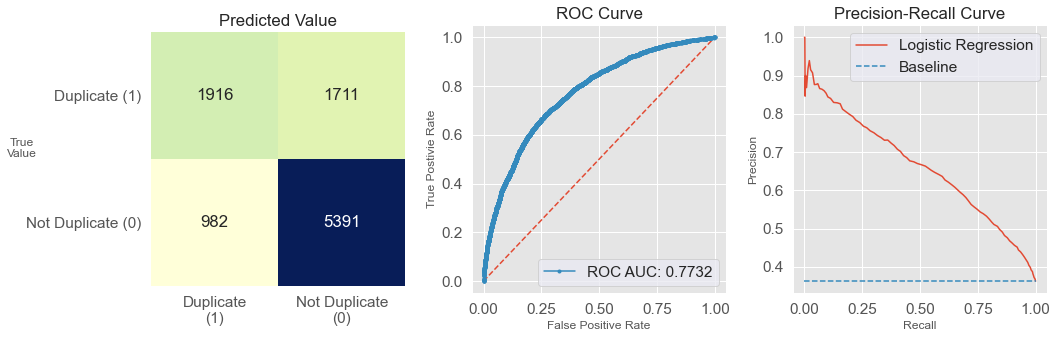

In [38]:
print_metrics(y_test, y_pred, y_prob, 'Logistic Regression')

## Linear Regression 
Original, Balanced 

In [39]:
### Create a new Logistic Regression Model
regr = LogisticRegression(class_weight='balanced')
### Train the model
regr.fit(X_train, y_train)
### Making predictions on the testing data
y_prob = regr.predict_proba(X_test)
y_pred = np.argmax(y_prob, axis=1)

True Positive: 2531
True Negative: 4526
False Positive (Type 1 error): 1096
False Negative (Type 2 error): 1847
Accuracy: 0.7057
Precision: 0.5781
Recall: 0.6978
F1-Score: 0.6324
Log Loss: 0.5698


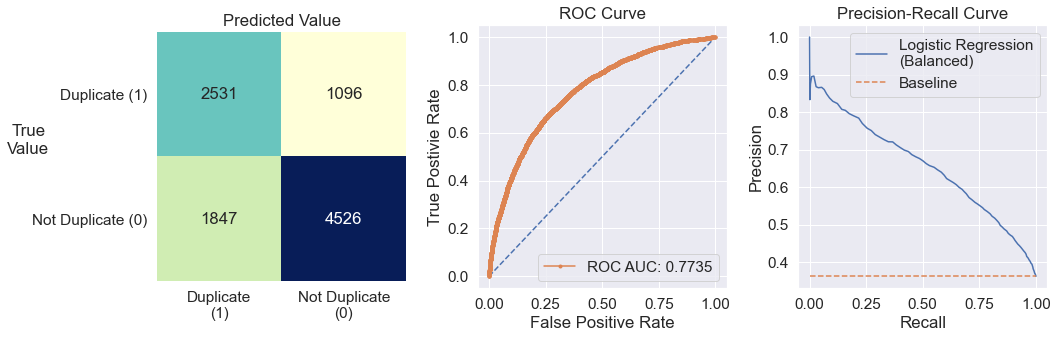

In [40]:
print_metrics(y_test, y_pred, y_prob, 'Logistic Regression\n(Balanced)')

After balancing the weights, we were able to increaase the recall to 73%. 

**Looking at the questions the model incorrectly predicted**

Below I created a function to print out *n* amount of wrong answers from both kinds of errors

In [41]:
def print_wrong_responses(y_test, y_pred, X_test_qs, n=5):
    print("""##############################################################
    Predicted True (y_hat = 1) but actually False (y_test = 0)
    (TYPE 1 ERROR)\n""")
    [print(f"Question 1:{X_test_qs['question1'].loc[example]}\nQuestion 2:{X_test_qs['question2'].loc[example]}", "\n") for example in X_test[(y_test == 0) & (y_pred == 1)].index[:n]]
    
    print("""##############################################################
    Predicted False (y_hat = 0) but actually True (y_test = 1)
    (TYPE 2 ERROR)\n""")
    [print(f"Question 1:{X_test_qs['question1'].loc[example]}\nQuestion 2:{X_test_qs['question2'].loc[example]}", "\n") for example in X_test[(y_test == 1) & (y_pred == 0)].index[:n]]

In [42]:
print_wrong_responses(y_test, y_pred, X_test_qs, n=5)

##############################################################
    Predicted True (y_hat = 1) but actually False (y_test = 0)
    (TYPE 1 ERROR)

Question 1:Who are some lesser known important historical figures of Aruba and what should people know about them?
Question 2:Who are some lesser known important historical figures of Georgia and what should people know about them? 

Question 1:What are the questions asked in SSB interviews?
Question 2:What questions are asked in an NDA SSB interview? 

Question 1:What are the best technology inventions of 2014?
Question 2:What are the best technology inventions? 

Question 1:What are some good civil engineering softwares for MacBook?
Question 2:What are the most important civil engineering softwares? 

Question 1:Can I make 30,000 a month playing poker?
Question 2:Can I make 900k a year playing poker online? Why or why not? 

##############################################################
    Predicted False (y_hat = 0) but actually True (y_t

## Linear Regression 
Unbalanced, Cleaned Data

In [43]:
### Create a logistic regression model
regr = LogisticRegression()
### Training the model
regr.fit(X_train_cleaned, y_train_cleaned)
### Making predictions on the testing data
y_prob = regr.predict_proba(X_test_cleaned)
y_pred = np.argmax(y_prob, axis=1)

True Positive: 1636
True Negative: 5375
False Positive (Type 1 error): 1991
False Negative (Type 2 error): 998
Accuracy: 0.7011
Precision: 0.6211
Recall: 0.4511
F1-Score: 0.5226
Log Loss: 0.5739


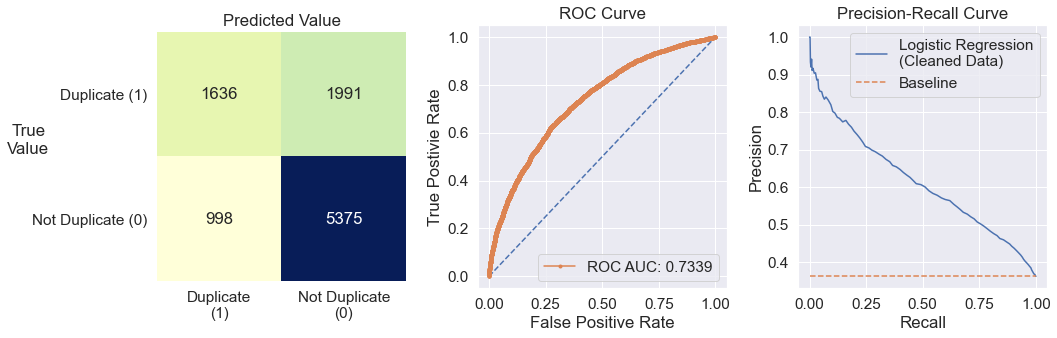

In [44]:
print_metrics(y_test_cleaned, y_pred, y_prob, 'Logistic Regression\n(Cleaned Data)')

## Linear Regression 
Balanced, Cleaned data

In [45]:
### Create a logistic regression model
regr = LogisticRegression(class_weight='balanced')
### Training the model
regr.fit(X_train_cleaned, y_train_cleaned)
### Making predictions on the testing data
y_prob = regr.predict_proba(X_test_cleaned)
y_pred = np.argmax(y_prob, axis=1)

True Positive: 2447
True Negative: 4252
False Positive (Type 1 error): 1180
False Negative (Type 2 error): 2121
Accuracy: 0.6699
Precision: 0.5357
Recall: 0.6747
F1-Score: 0.5972
Log Loss: 0.6065


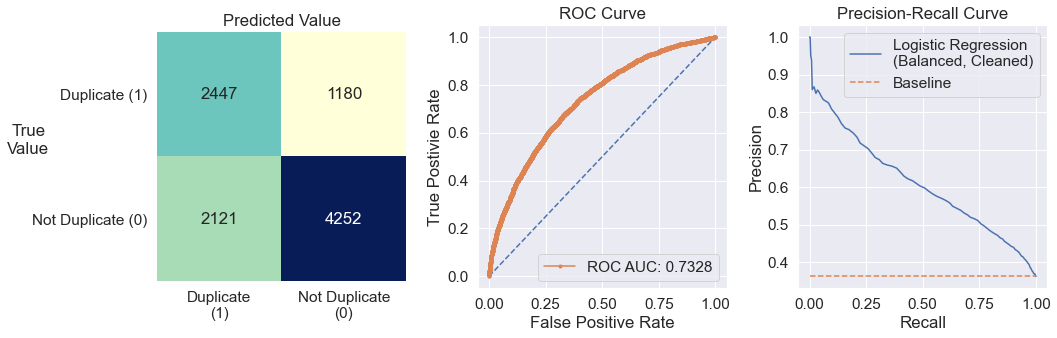

In [46]:
print_metrics(y_test_cleaned, y_pred, y_prob, 'Logistic Regression\n(Balanced, Cleaned)')

In [47]:
print_wrong_responses(y_test, y_pred, X_test_qs, n=5)

##############################################################
    Predicted True (y_hat = 1) but actually False (y_test = 0)
    (TYPE 1 ERROR)

Question 1:Is it true that Pakistan imports salt from India?
Question 2:Which among these to chose for graduate school? 

Question 1:Are contemporary western societies more body conscious than ever before?
Question 2:Is the human body more complicated than space science? 

Question 1:What was the best way you've ever seen a teacher eradicate bullying in their class?
Question 2:What are the best ways to handle bullies? 

Question 1:How do I remove a ROM virus on android?
Question 2:How do I remove Spyware, Malware and viruses from my Android tablet? 

Question 1:What are the questions asked in SSB interviews?
Question 2:What questions are asked in an NDA SSB interview? 

##############################################################
    Predicted False (y_hat = 0) but actually True (y_test = 1)
    (TYPE 2 ERROR)

Question 1:How do you determi